In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [4]:
cat4=cv2.imread('CATS_DOGS/CATS_DOGS/train/CAT/4.jpg')

In [5]:
cat4


array([[[123, 129, 140],
        [124, 130, 141],
        [127, 133, 144],
        ...,
        [164, 164, 170],
        [171, 171, 177],
        [178, 178, 184]],

       [[123, 129, 140],
        [124, 130, 141],
        [127, 133, 144],
        ...,
        [160, 163, 168],
        [165, 168, 173],
        [170, 173, 178]],

       [[123, 129, 140],
        [124, 130, 141],
        [127, 133, 144],
        ...,
        [156, 159, 164],
        [158, 161, 166],
        [160, 163, 168]],

       ...,

       [[124, 144, 155],
        [ 78,  98, 109],
        [ 36,  55,  63],
        ...,
        [ 15,  17,   5],
        [ 15,  17,   5],
        [ 16,  18,   6]],

       [[118, 138, 149],
        [ 77,  97, 108],
        [ 37,  56,  64],
        ...,
        [ 14,  16,   4],
        [ 15,  17,   5],
        [ 16,  18,   6]],

       [[ 50,  70,  81],
        [ 26,  46,  57],
        [  2,  21,  29],
        ...,
        [ 15,  17,   5],
        [ 16,  18,   6],
        [ 17,  19,   7]]

In [6]:
cat4=cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB
                 )

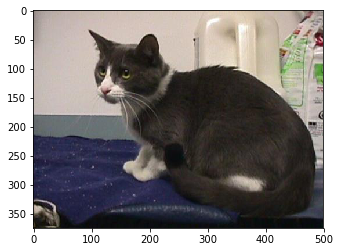

In [7]:
plt.imshow(cat4)

In [8]:
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [9]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

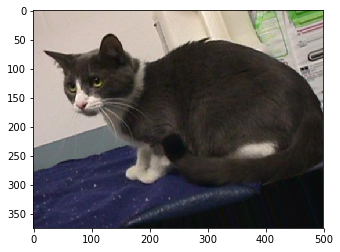

In [10]:
plt.imshow(image_gen.random_transform(cat4))

In [11]:
image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [12]:
input_shape=(150,150,3)

In [13]:
from keras.models import Sequential

In [14]:
from keras.layers import Dense,Activation,Dropout,Flatten,Conv2D,MaxPooling2D

In [15]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [17]:

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/train',
                                              target_size=input_shape[:2],
                                             batch_size=16,
                                              class_mode='binary')

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/CATS_DOGS/test',
                                              target_size=input_shape[:2],
                                             batch_size=16,
                                              class_mode='binary')

Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [18]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [19]:
results=model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
 39/150 [======>.......................] - ETA: 1:12 - loss: 0.7009 - acc: 0.4984

C:\Users\hp\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\hp\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\hp\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\hp\anaconda3\envs\python-cvcourse\lib\site-packages\PIL\TiffImagePlugin.py:747: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\hp\anaconda3\env

150/150 [==============================] - 267s 2s/step - loss: 0.6948 - acc: 0.5083 - val_loss: 0.7091 - val_acc: 0.5001


In [20]:
results.history['acc']

[0.5083333333333333]

In [28]:
dog=cv2.imread('CATS_DOGS/CATS_DOGS/test/DOG/10000.jpg')

In [34]:
from keras.preprocessing import image

In [43]:
dog=cv2.cvtColor(dog,cv2.COLOR_BGR2RGB
                 )

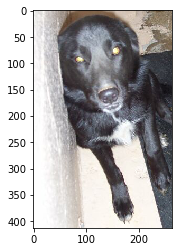

In [44]:
plt.imshow(dog)

In [48]:
dog_img=image.load_img('CATS_DOGS/CATS_DOGS/test/DOG/10000.jpg',target_size=(150,150))

In [49]:
dog_img=image.img_to_array(dog_img)

In [50]:
dog_img.shape

(150, 150, 3)

In [51]:
import numpy as np
dog_img=np.expand_dims(dog_img,axis=0)

In [52]:
dog_img.shape

(1, 150, 150, 3)

In [53]:
model.predict(dog_img)

array([[0.51392555]], dtype=float32)

In [54]:
model.predict_classes(dog_img)

array([[1]])